#Fonte de Dados:
Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.

#Explicação do das variáveis:
distancefromhome - a distância de casa onde a transação aconteceu.

distancefromlast_transaction - a distância da última transação aconteceu.

ratiotomedianpurchaseprice - Razão da transação do preço de compra para o preço de compra mediano.

repeat_retailer - É a transação que aconteceu do mesmo varejista.

used_chip - É a transação através de chip (cartão de crédito).

usedpinnumber - A transação aconteceu usando o número PIN.

online_order - A transação é um pedido online.

fraude - A transação é fraudulenta.

#1 - Subindo a base de dados:

In [12]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report #métricas de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [13]:
dados = pd.read_csv("/content/card_transdata (1).csv", sep=",")
dados.head()

ParserError: ignored

In [3]:
dados.shape

(27492, 8)

#2 - Tratando inconsistências na base

In [4]:
dados.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    1
repeat_retailer                   2
used_chip                         2
used_pin_number                   2
online_order                      2
fraud                             2
dtype: int64

In [5]:
dados = dados.dropna()

In [6]:
dados.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

#3 - Análise exploratória dos dados

In [7]:
dados.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,27490.000000,27490.000000,27490.000000,27490.000000,27490.000000,27490.000000,27490.000000,27490.000000
mean,26.698187,4.897789,1.821263,0.880829,0.351764,0.103092,0.647836,0.085558
std,62.262843,21.238738,2.693928,0.323995,0.477530,0.304085,0.477654,0.279716
min,0.049270,0.000856,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.844498,0.297855,0.481362,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.074362,0.997749,0.999089,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.952108,3.374301,2.103938,1.000000,1.000000,0.000000,1.000000,0.000000
max,2353.226927,1184.941415,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Número de transações fraudulentas
dados[dados["fraud"] == 1].fraud.count() #filtro com contagem dos dados

2352

In [9]:
total = len(dados)
total

27490

In [14]:
total = len(dados)
totalnaofraudes=dados[dados["fraud"]==0].fraud.count()
totalfraudes=dados[dados["fraud"]==1].fraud.count()

percentual_fraudes=totalfraudes/total

print("Total de Dados: ", total)
print("Total de Não fraudes: ", totalnaofraudes)
print("Total de Fraudes: ", totalfraudes)
print("Percentual e Fraudes da Base: ", (round(percentual_fraudes, 2)*100), "%")

Total de Dados:  27490
Total de Não fraudes:  25138
Total de Fraudes:  2352
Percentual e Fraudes da Base:  9.0 %


<function matplotlib.pyplot.show(close=None, block=None)>

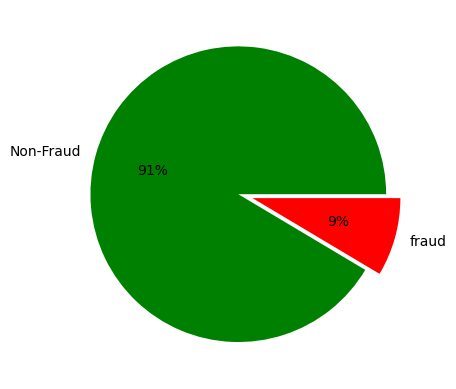

In [15]:
categorias=["Non-Fraud", "fraud"]
plt.pie(dados["fraud"]. value_counts(), labels=categorias, autopct="%.0f%%", explode=(0, 0.1), colors=("g", "r"))
plt.show

In [16]:
dados_fraude=dados[dados["fraud"]==1]
dados_fraude.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [17]:
dados_fraude.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,2352.0,62.921159,126.459658,0.122193,4.607377,14.750325,93.496121,2353.226927
distance_from_last_transaction,2352.0,12.882756,48.450625,0.001604,0.323502,1.192303,4.492725,804.384201
ratio_to_median_purchase_price,2352.0,5.885852,4.952933,0.016130,3.524064,4.993074,7.199234,48.931634
repeat_retailer,2352.0,0.879677,0.325408,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,2352.0,0.259354,0.438373,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,2352.0,0.003401,0.058234,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,2352.0,0.957908,0.200841,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,2352.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='online_order', ylabel='count'>

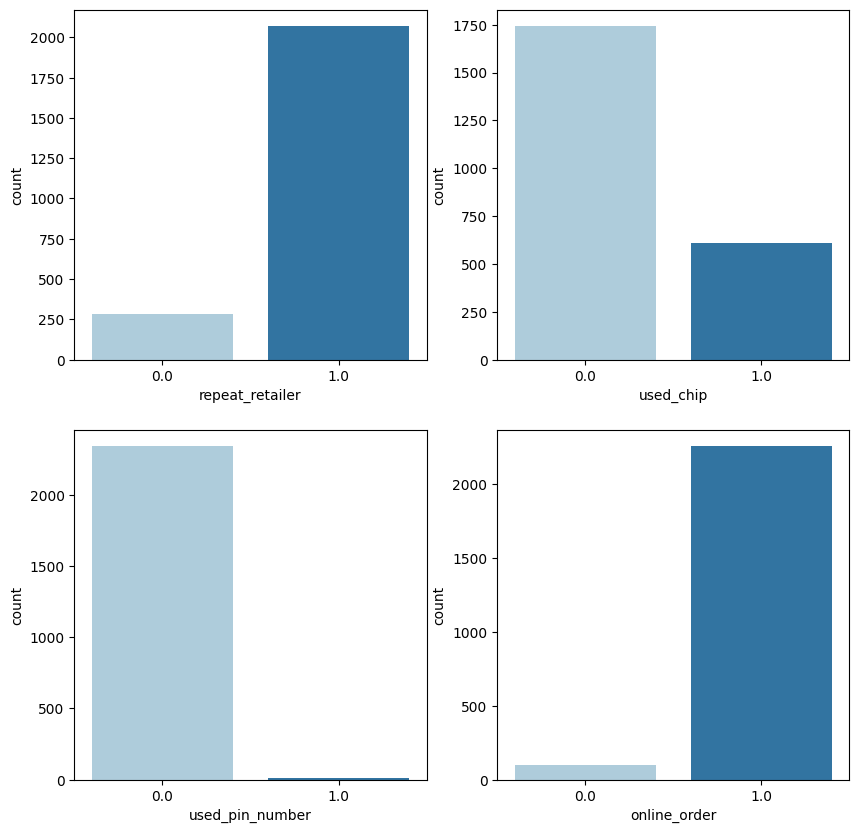

In [19]:
plt.figure(figsize=(10,10)) #Configurando o tamanho da visualização

plt.subplot(2,2,1)
sns.countplot(x="repeat_retailer", palette="Paired", data=dados_fraude) #aconteceu no mesmo varegista

plt.subplot(2,2,2)
sns.countplot(x="used_chip", palette="Paired", data=dados_fraude) #Uso de cartão de crédito

plt.subplot(2,2,3)
sns.countplot(x="used_pin_number", palette="Paired", data=dados_fraude) #Utilizou o mesmo número Pin

plt.subplot(2,2,4)
sns.countplot(x="online_order", palette="Paired", data=dados_fraude) #foi em uma compra online

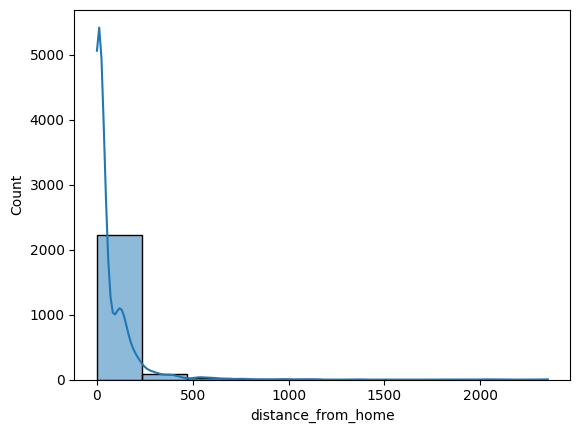

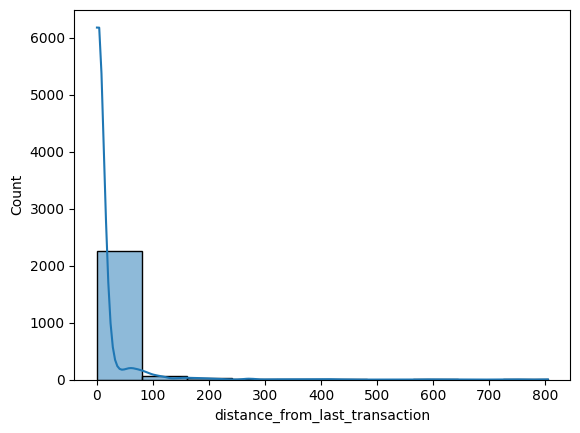

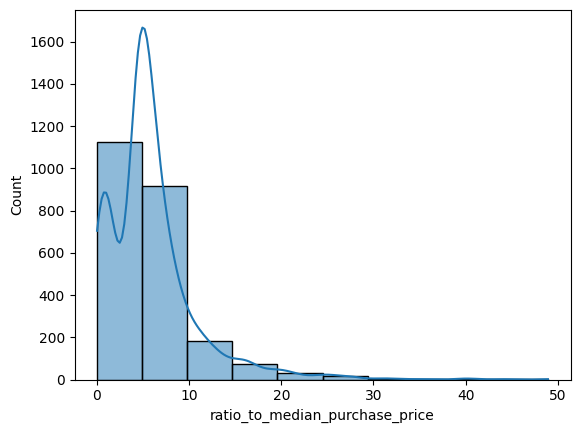

In [23]:
coluna_numerica=["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in coluna_numerica:
  plt.figure()
  plot=dados_fraude[column]
  sns.histplot(plot, bins=10, kde=True)
  plt.show()

In [24]:
for column in [0,1,2]:
  dados_fraude.iloc[:,column]=np.log10(dados_fraude.iloc[:, column]) #transformalçao logaritma

<ipython-input-24-4f087e02c5a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraude.iloc[:,column]=np.log10(dados_fraude.iloc[:, column]) #transformalçao logaritma
<ipython-input-24-4f087e02c5a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraude.iloc[:,column]=np.log10(dados_fraude.iloc[:, column]) #transformalçao logaritma
<ipython-input-24-4f087e02c5a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

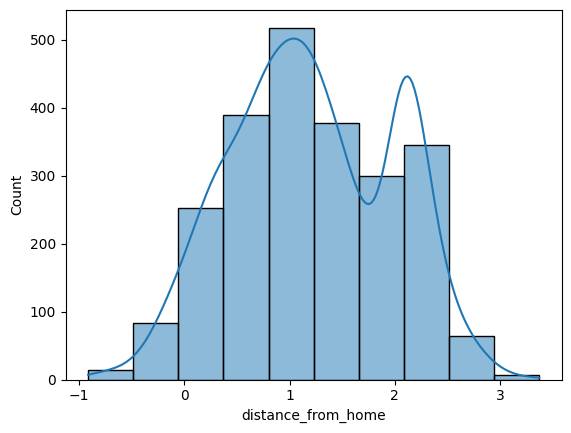

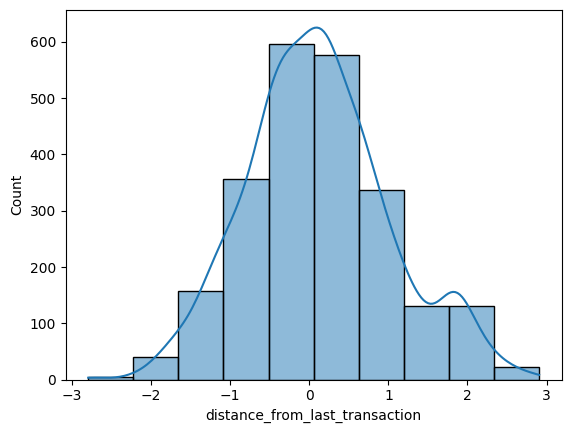

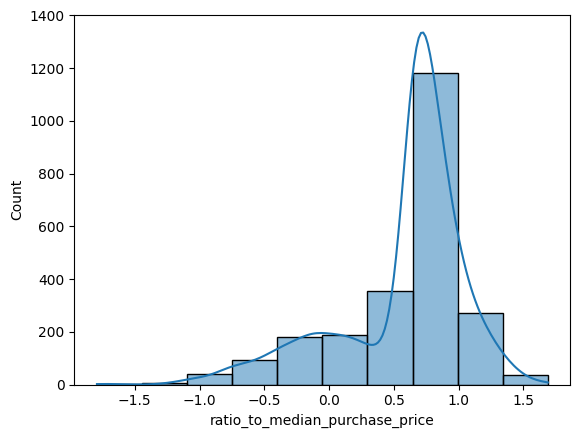

In [25]:
colunas_numericas_normal=["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in colunas_numericas_normal:
  plt.figure()
  plot = dados_fraude[column]
  sns.histplot(plot, bins=10, kde=True)
  plt.show()

In [26]:
round(dados_fraude.distance_from_last_transaction.std(),2)

0.91

In [28]:
round(dados_fraude.distance_from_last_transaction.mean(), 2)

0.12

<Axes: >

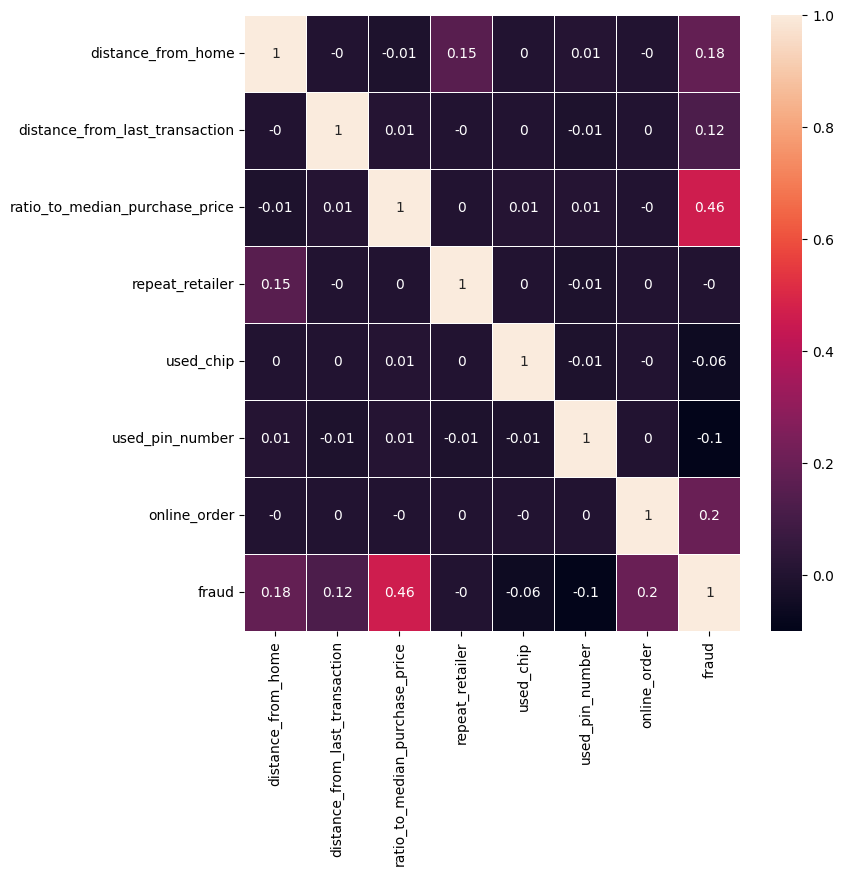

In [29]:
correlation_matrix=dados.corr().round(2)

fig, ax=plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

#4 - Criação do modelo de Machine Learning

In [30]:
#Separação da base de treino e teste
x = dados[['distance_from_home','ratio_to_median_purchase_price', 'online_order']]
y = dados['fraud'] #target

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino

#5 - Feature Engineer
Comparação da escala normal das variáveis vs. escalonamento das variáveis

Comparação do real x dados transformado (normalização e padronização)
padronização: zera a média e deixa o desvio padrão unitário.( obteremos desvios-padrão menores por meio do processo de normalização minmaxscaler).
normalização: coloca a variável na escala entre 0 até 1.
Análise da plotagem real e verificar se está muito diferente da plotagem com standerscaler e minmaxsclaer.
Escolha o tipo de transformação de escala que melhor se adequa a suas variáveis. Se o desenho do gráfico mudar, você está descaracterizando o dado.
Transformar e normlaizar a escala das variáveis.

In [32]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [33]:
# Na hora de transformar, devemos transformar ambos os conjuntos
x_train_escalonado = scaler.transform(x_train)#treino
x_test_escalonado = scaler.transform(x_test)#teste

In [34]:
x_train

,distance_from_home,ratio_to_median_purchase_price,online_order
26116,19.413400,0.862023,1.0
3046,24.736198,1.568741,1.0
12426,2.105909,1.273141,0.0
27417,0.616176,0.137806,1.0
22023,11.829926,0.169281,1.0
...,...,...,...
18576,124.755066,5.318571,1.0
25968,36.787589,1.066712,0.0
20824,113.084758,0.363599,0.0
13759,12.384671,0.324942,1.0


In [35]:
x_train_escalonado

array([[8.22892836e-03, 1.30588918e-02, 1.00000000e+00],
       [1.04908902e-02, 2.39081953e-02, 1.00000000e+00],
       [8.73983865e-04, 1.93702443e-02, 0.00000000e+00],
       ...,
       [4.80352545e-02, 5.40725312e-03, 0.00000000e+00],
       [5.24201833e-03, 4.81379873e-03, 1.00000000e+00],
       [3.78229325e-04, 1.46341837e-02, 1.00000000e+00]])

#6 - Configurando o modelo

In [36]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature nam

Text(0, 0.5, 'Mean Error')

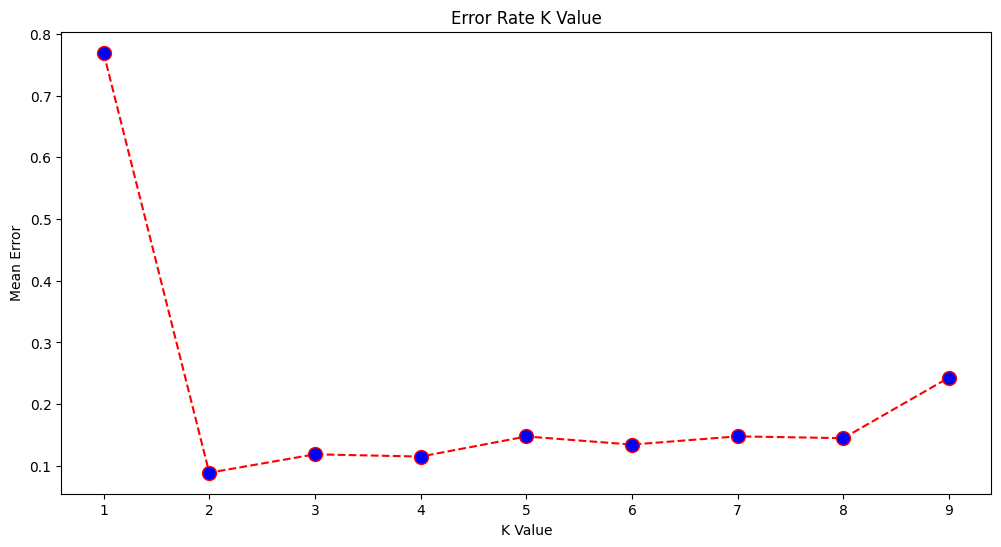

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [38]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

In [39]:
# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [40]:
y_predito = modelo_classificador.predict(x_test_escalonado) #defininfo as predições

In [41]:
#print('Training set score: {:.4f}'.format(modelo_classificador.score(x_train, y_train)))
#print('Test set score: {:.4f}'.format(modelo_classificador.score(x_test, y_test)))

#7 - Analisando resultados

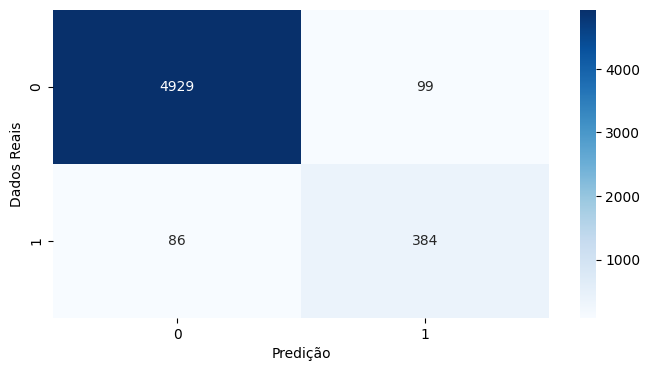

In [42]:
matriz_confusao = confusion_matrix(y_test, y_predito)
plt.figure(figsize = (8, 4))
sns.heatmap(matriz_confusao, annot = True, fmt="d",cmap = "Blues")
plt.xlabel("Predição");
plt.ylabel("Dados Reais");

In [43]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5028
         1.0       0.80      0.82      0.81       470

    accuracy                           0.97      5498
   macro avg       0.89      0.90      0.89      5498
weighted avg       0.97      0.97      0.97      5498

